# Summary Statistics and Diagnostics
In this chapter, you will gain a deeper understanding of your time series data by computing summary statistics and plotting aggregated views of your data.

# 1. Clean your time series data
## 1.1 Find missing values
In the field of Data Science, it is common to encounter datasets with missing values. This is especially true in the case of time series data, where missing values can occur if a measurement fails to record the value at a specific timestamp. To count the number of missing values in a DataFrame called <code>df</code> that contains time series data, you can use the command:

<code>    missing_values = df.isnull().sum()
</code>

In this exercise, you will learn how to find whether your data contains any missing values.

### Instructions:
* The <code>co2_levels</code> time series DataFrame contains time series data on global CO2 levels. Start by printing the first seven rows of <code>co2_levels</code>
* Set the <code>'datestamp'</code> column as the index of the <code>co2_levels</code> DataFrame.
* Print the total number of missing values in <code>co2_levels</code>.

In [1]:
import pandas as pd
co2_levels = pd.read_csv('_datasets/ch2_co2_levels.csv')

In [2]:
# Display first seven rows of co2_levels
print(co2_levels.head(7))

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4
5  1958-05-03  316.9
6  1958-05-10    NaN


In [3]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


## 1.2 Handle missing values
In order to replace missing values in your time series data, you can use the command:

<code>	df = df.fillna(method="ffill")</code>

where the argument specifies the type of method you want to use. For example, specifying <code>bfill</code> (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while <code>ffill</code> (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.
Recall from the previous exercise that <code>co2_levels</code> has 59 missing values.

### Instructions:
* Impute these missing values in <code>co2_levels</code> by using backfilling. 
* Print the total number of missing values.

In [4]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


# 2. Plot aggregates of your data
## 2.1 Display rolling averages
It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" your data, and can be particularly useful when your time series contains a lot of noise or outliers. For a given DataFrame <code>df</code>, you can obtain the rolling average of the time series by using the command:

<code>	df_mean = df.rolling(window=12).mean()</code>

The <code>window</code> parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to <code>window=365</code>. In addition, it is easy to get rolling values for other other metrics, such as the standard deviation (<code>.std()</code>) or variance (<code>.var()</code>).

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

<Figure size 640x480 with 1 Axes>

## 2.2 Display aggregated values
You may sometimes be required to display your data in a more aggregated form. For example, the <code>co2_levels</code> data contains weekly data, but you may need to display its values aggregated by month of year. In datasets such as the <code>co2_levels</code> DataFrame where the index is a <code>datetime</code> type, you can extract the year of each dates in the index:

<code>    # extract of the year in each dates of the df DataFrame
    index_year = df.index.year
</code>

To extract the month or day of the dates in the indices of the <code>df</code> DataFrame, you would use <code>df.index.month</code> and <code>df.index.day</code>, respectively.
You can then use the extracted year of each indices in the <code>co2_levels</code> DataFrame and the <code>groupby</code> function to compute the mean CO2 levels by year:

<code>df_by_year = df.groupby(index_year).mean()</code>

### Instructions:
* Extract the month for each of the dates in the index of the <code>co2_levels</code> DataFrame and assign the values to a variable called <code>index_month</code>.
* Using the <code>groupby</code> and <code>mean</code> functions from the <code>pandas</code> library, compute the monthly mean CO2 levels in the <code>co2_levels</code> DataFrame and assign that to a new DataFrame called <code>mean_co2_levels_by_month</code>.
* Plot the values of the <code>mean_co2_levels_by_month</code> DataFrame using a fontsize of 6 for the axis ticks.

In [6]:
co2_levels = pd.read_csv('_datasets/ch2_co2_levels.csv')

# Set datestamp column as index
co2_levels = co2_levels.set_index(pd.to_datetime(co2_levels['datestamp']))

# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

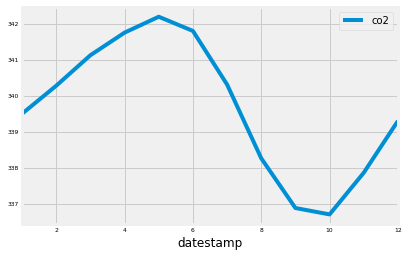

In [7]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

# 3. Summarize the values in your time series data
## 3.1 Compute numerical summaries
You have learnt how to display and annotate time series data in multiple ways, but it is also informative to collect summary statistics of your data. Being able to achieve this task will allow you to share and discuss statistical properties of your data that can further support the plots you generate. In <code>pandas</code>, it is possible to quickly obtain summaries of columns in your DataFrame by using the command:

<code>print(df.describe())
</code>

This will print statistics including the mean, the standard deviation, the minima and maxima and the number of observations for all numeric columns in your <code>pandas</code> DataFrame.

### Instructions:
* Print the statistical summaries of the <code>co2_levels</code> DataFrame. 
* Print the reported minimum value in the <code>co2_levels</code> DataFrame.
* Print the reported maximum value in the <code>co2_levels</code> DataFrame.

In [8]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000


In [9]:
# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

313.0
373.9


# 3.2 Boxplots and Histograms
Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the <code>.boxplot()</code> method on a DataFrame.

Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread. An example of how to generate a histogram is shown below:

<pre>
<code>ax = co2_levels.plot(kind='hist', bins=100)
</code></pre>

Here, we used the standard <code>.plot()</code> method but specified the <code>kind</code> argument to be <code>'hist'</code>. In addition, we also added the <code>bins=100</code> parameter, which specifies how many intervals (i.e <code>bins</code>) we should cut our data into.

### Instructions:
* Using the <code>co2_levels</code> DataFrame, produce a boxplot of the CO2 level data.
* Using the <code>co2_levels</code> DataFrame, produce a histogram plot of the CO2 level data with 50 bins.

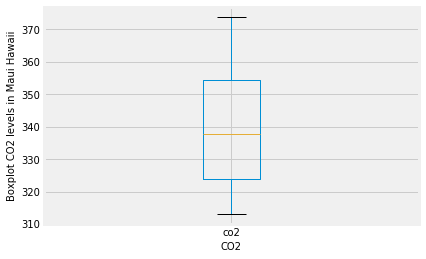

In [10]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
# plt.legend(fontsize=10)
plt.show()

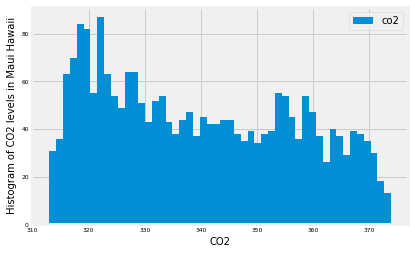

In [11]:
# Generate a histogram
ax = co2_levels['co2'].plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

## 3.3 Density plots
In practice, histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data. An example of how to generate a density plot of is shown below:

<code>ax = df.plot(kind='density', linewidth=2)
</code>

The standard <code>.plot()</code> method is specified with the <code>kind</code> argument set to <code>&#39;density&#39;</code>. We also specified an additional parameter <code>linewidth</code>, which controls the width of the line to be plotted.

### Instructions:
* Using the <code>co2_levels</code> DataFrame, produce a density plot of the CO2 level data with line width parameter of 4.
* Annotate the x-axis labels of your boxplot with the string <code>'CO2'</code>.
* Annotate the y-axis labels of your boxplot with the string <code>'Density plot of CO2 levels in Maui Hawaii'</code>

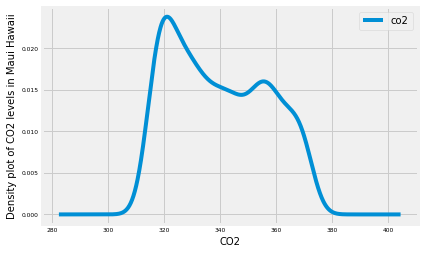

In [12]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)
plt.show()